In [31]:
!pip install tensorflow streamlit matplotlib numpy pandas

In [32]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
altair                       5.3.0
asttokens                    2.4.1
astunparse                   1.6.3
attrs                        23.2.0
blinker                      1.8.0
cachetools                   5.3.3
certifi                      2024.2.2
charset-normalizer           3.3.2
click                        8.1.7
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.2.1
cycler                       0.12.1
debugpy                      1.8.1
decorator                    5.1.1
exceptiongroup               1.2.1
executing                    2.0.1
flatbuffers                  24.3.25
fonttools                    4.51.0
gast                         0.5.4
gitdb                        4.0.11
GitPython                    3.1.43
google-pasta                 0.2.0
grpcio                       1.62.2
h5py                         3.11.0


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [34]:
data_train_path = "Fruits_Vegetables/train"
data_test_path = "Fruits_Vegetables/test"
data_val_path = "Fruits_Vegetables/validation"

In [35]:
img_width = 180
img_height = 180

In [36]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False
)

Found 3115 files belonging to 36 classes.


In [37]:
data_cat = data_train.class_names

In [38]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [39]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False,
)

Found 351 files belonging to 36 classes.


In [40]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False,
)

Found 359 files belonging to 36 classes.


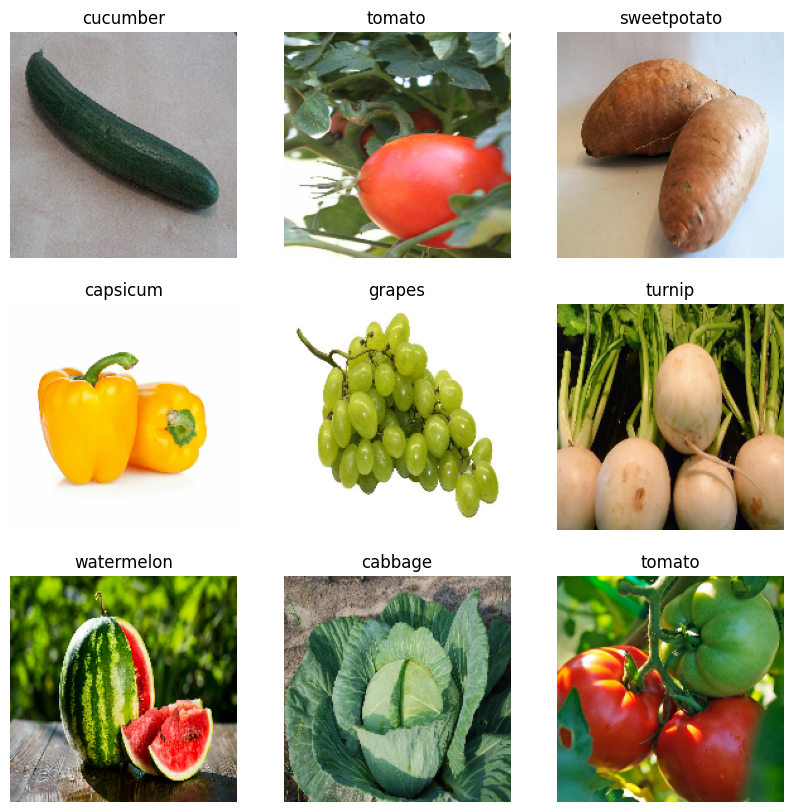

In [41]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(data_cat[labels[i]])
        plt.axis("off")

In [42]:
from tensorflow.keras.models import Sequential

In [43]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [44]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [45]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

In [46]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [47]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 168ms/step - accuracy: 0.0585 - loss: 4.0096 - val_accuracy: 0.3134 - val_loss: 2.5036
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 178ms/step - accuracy: 0.2378 - loss: 2.6439 - val_accuracy: 0.5043 - val_loss: 1.6941
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 155ms/step - accuracy: 0.4034 - loss: 2.1294 - val_accuracy: 0.7436 - val_loss: 1.0275
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 172ms/step - accuracy: 0.5454 - loss: 1.6733 - val_accuracy: 0.8575 - val_loss: 0.6088
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 194ms/step - accuracy: 0.6725 - loss: 1.1599 - val_accuracy: 0.9117 - val_loss: 0.4095
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 181ms/step - accuracy: 0.8326 - loss: 0.5873 - val_accuracy: 0.9316 - val_loss: 0.3713
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 197ms/step - accuracy: 0.8966 - loss: 0.3532 - val_accuracy: 0.9487 - val_loss: 0.3338
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 184ms/step - accuracy: 0.9473 - loss: 0.2104 - val_accu

Text(0.5, 1.0, 'Loss')

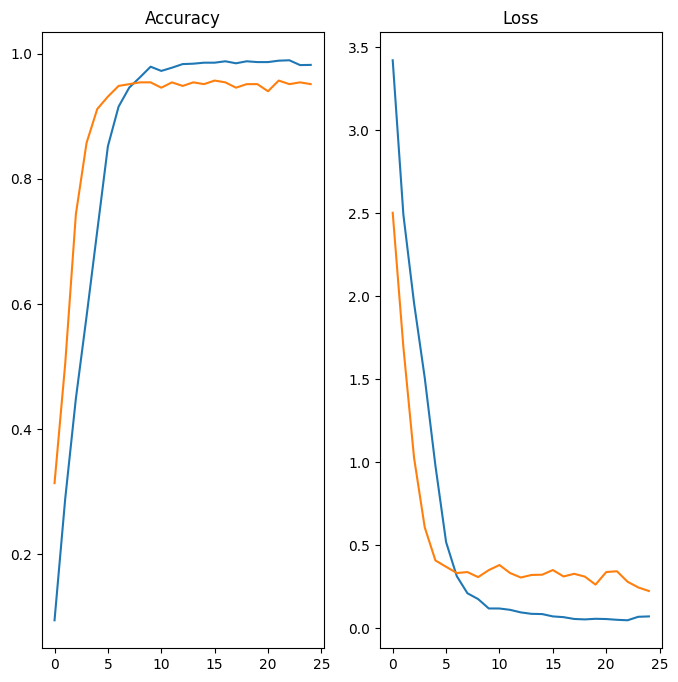

In [48]:
epoch_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epoch_range, history.history["accuracy"], label="Training Accuracy")
plt.plot(epoch_range, history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(epoch_range, history.history["loss"], label="Training Loss")
plt.plot(epoch_range, history.history["val_loss"], label="Validation Loss")
plt.title("Loss")


In [49]:
image = "paprika.jpg"
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_batch = tf.expand_dims(img_arr,0)

In [50]:
predict = model.predict(img_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


In [51]:
score = tf.nn.softmax(predict)

In [52]:
print(
    "vegetable/fruit in image is {} with accuracy of {:.2f}%".format(
        data_cat[np.argmax(score)], np.max(score) * 100
    )
)

vegetable/fruit in image is paprika with accuracy of 100.00%


In [ ]:
model.save("Image_Classification.keras")